For images,we can display the frequency of values for colors.

Each of the three RGB channels has values between 0-255.

We can plot these as 3 histograms on top of each other to see how much of each channel there is.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dark_house = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/horse.jpg")
show_horse = cv2.cvtColor(dark_house, cv2.COLOR_RGB2BGR)

rainbow = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_RGB2BGR)

blue_bricks = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_RGB2BGR)

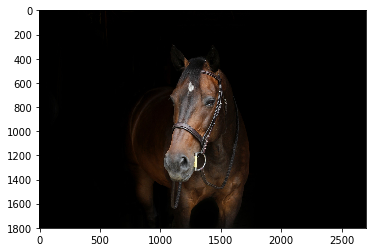

In [3]:
plt.imshow(show_horse)

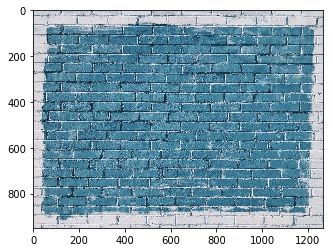

In [4]:
plt.imshow(show_bricks)

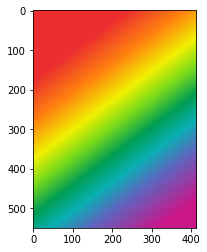

In [5]:
plt.imshow(show_rainbow)

In [8]:
# Channel is 0 because blue in BGR is at 0.
hist_values = cv2.calcHist([blue_bricks], channels = [0], mask = None, histSize = [256], ranges = [0,256])

In [9]:
hist_values.shape

(256, 1)

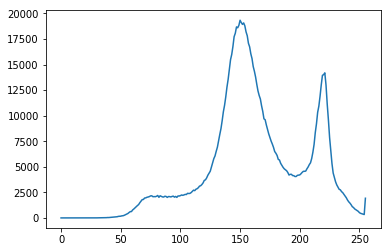

In [10]:
plt.plot(hist_values)

In [11]:
# Channel is 0 because blue in BGR is at 0.
hist_values2 = cv2.calcHist([dark_house], channels = [0], mask = None, histSize = [256], ranges = [0,256])

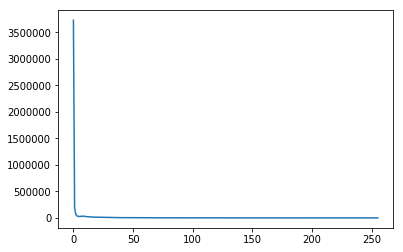

In [12]:
plt.plot(hist_values2)

The above graph is because most of the color in the horse picture is black and thus the blue part is very less.

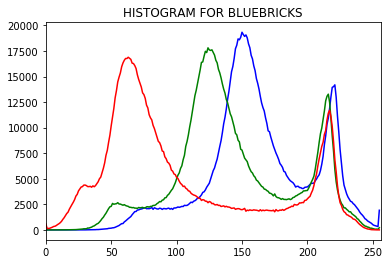

In [15]:
img = blue_bricks
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.title("HISTOGRAM FOR BLUEBRICKS");

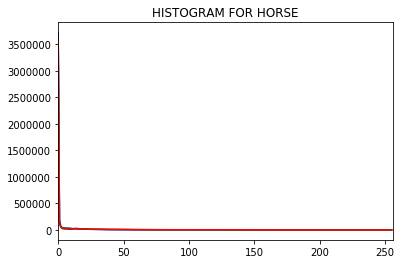

In [18]:
img = dark_house
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.title("HISTOGRAM FOR HORSE");

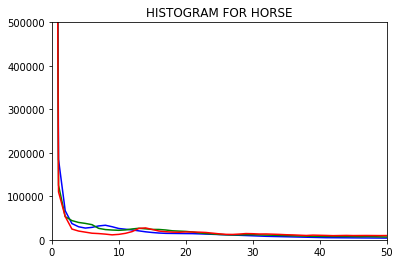

In [21]:
img = dark_house
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,50])
    plt.ylim([0,500000])

plt.title("HISTOGRAM FOR HORSE");

**As the image is very large so we cant see the bump clearly.**

In [22]:
dark_house.shape

(1800, 2700, 3)

So the pixels in this image is 1800*2700*3 = 14580000 pixels.


**HISTOGRAM EQUALIZATION**

It is a method of contrast adjustment based on the image's histogram.
Like with **gammma** we adjusted the**brightness**....but with this we are going to adjust the **contrast**. 


**CALCULATING HOSTOGRAM OF A PARTICULAT MASKED REGION**

In [24]:
rainbow = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_RGB2BGR)


In [25]:
img = rainbow

In [26]:
img.shape

(550, 413, 3)

In [27]:
img.shape[:2]

(550, 413)

In [28]:
mask = np.zeros(img.shape[:2], np.uint8)
# his mask is pure black right now.

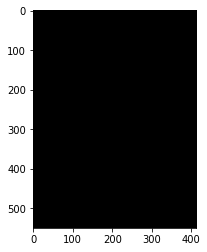

In [31]:
plt.imshow(mask, cmap = 'gray');

In [32]:
mask[300:400, 100:400] = 255

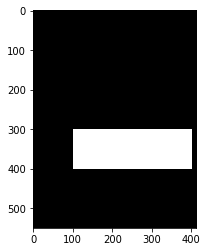

In [34]:
plt.imshow(mask, cmap = 'gray');

In [35]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
# This is for actual histogram calculation.

In [37]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask = mask)
# This is for seeing the mask on the image.

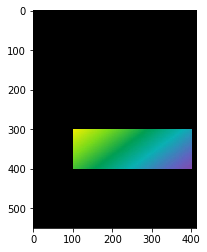

In [38]:
plt.imshow(show_masked_img)

In [40]:
hist_masked_values_red = cv2.calcHist([rainbow],channels = [2], mask = mask,
                                     histSize =[256], ranges = [0,256] )

In [41]:
# To compare with hist_masked_values_red.abs
hist_values_red = cv2.calcHist([rainbow],channels = [2], mask = None,
                                     histSize =[256], ranges = [0,256] )

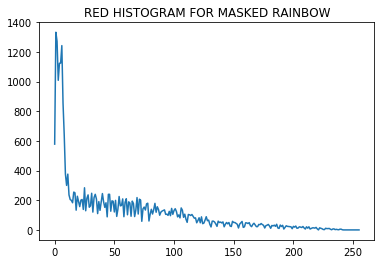

In [44]:
plt.plot(hist_masked_values_red)
plt.title("RED HISTOGRAM FOR MASKED RAINBOW");

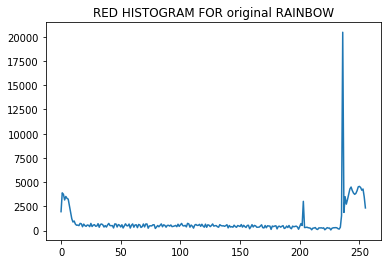

In [46]:
plt.plot(hist_values_red)
plt.title("RED HISTOGRAM FOR original RAINBOW");

**HISTOGRAM EQUALIZATION**

In [48]:
gorilla = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/gorilla.jpg",0)

In [49]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

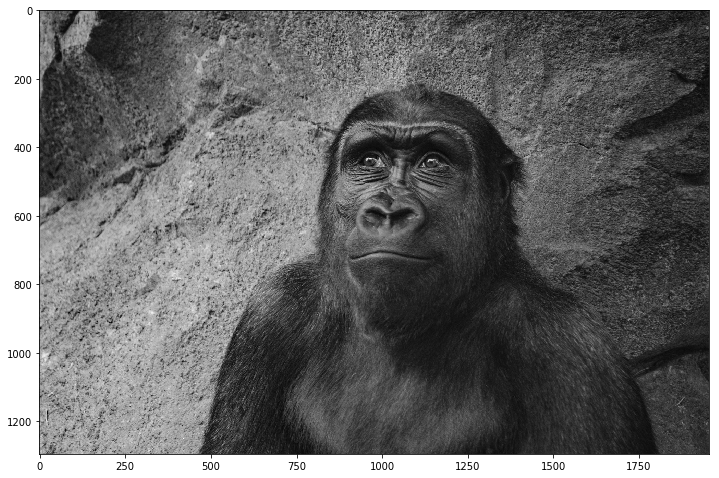

In [50]:
display_img(gorilla)

In [51]:
hist_values = cv2.calcHist([gorilla],channels = [0], mask = None,
                          histSize = [256], ranges = [0,256])

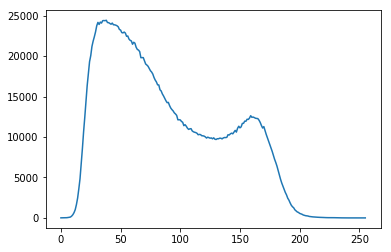

In [52]:
plt.plot(hist_values)

In [53]:
eq_gorilla = cv2.equalizeHist(gorilla)

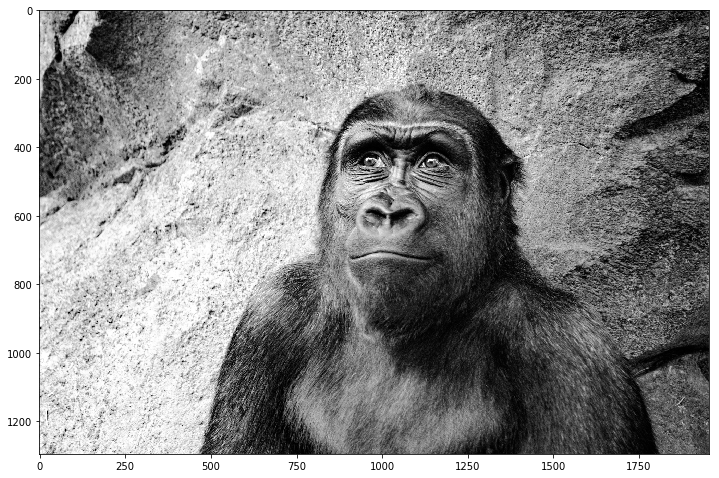

In [55]:
display_img(eq_gorilla)

In [56]:
hist_values = cv2.calcHist([eq_gorilla],channels = [0], mask = None,
                          histSize = [256], ranges = [0,256])

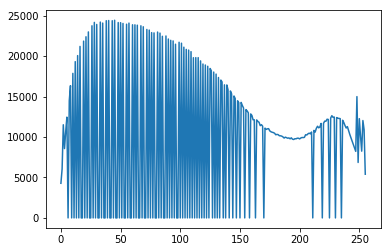

In [57]:
plt.plot(hist_values)

In [58]:
# Doing the same for an colored image.

color_gorilla = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/gorilla.jpg")

In [61]:
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

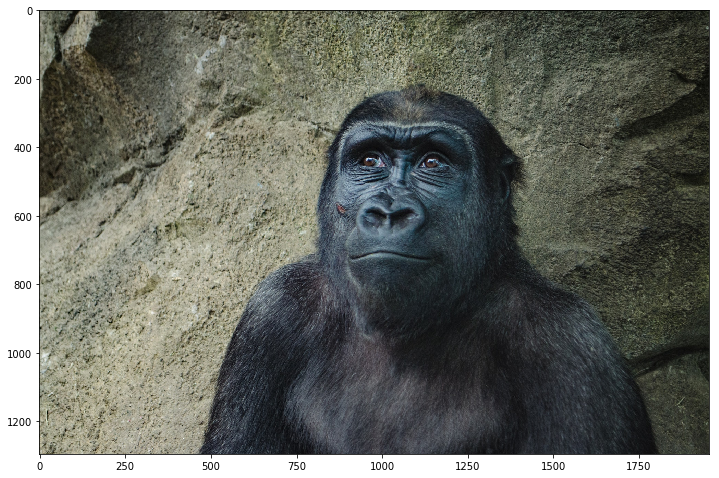

In [63]:
display_img(show_gorilla)

**First we are required to convert in HSL or HSV**

In [64]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [65]:
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [66]:
hsv[:,:,2].min()

1

In [68]:
# Replacing the original values with the equalized ones.
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [72]:
# Now to display the image, we convert the hsv to RGB.
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

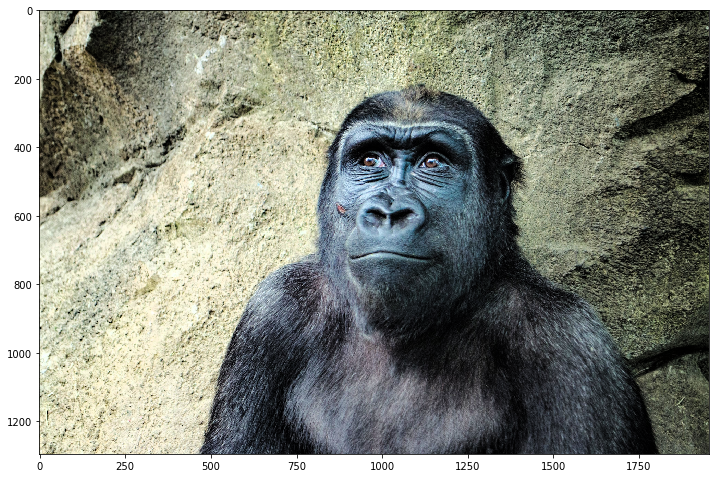

In [73]:
display_img(eq_color_gorilla)